<a href="https://colab.research.google.com/github/Firay24/Jointscamp/blob/main/Project_Datmin_Rev_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center><h1>**`STUDI KASUS`**</h1></center>

`Overview`

Saat ini, perusahaan asuransi menyediakan layanan asuransi yang beragam seperti asuransi jiwa, asuransi kesehatan, asuransi properti, maupun asuransi kendaraan. Setiap perusahaan berlomba-lomba untuk meningkatkan pelayanan, efisiensi operasional, maupun menambah jumlah pelanggan asuransi. Hal-hal tersebut dapat mudah dicapai dengan mengaplikasikan machine learning (ML).

`Problems!!!`

Sebuah perusahaan asuransi bernama "J Insurance" sudah berdiri lama. Produk yang mereka berikan baru berupa asuransi kesehatan, asuransi jiwa, dan asuransi kendaraan. Perusahaan "J Insurance" berkembang pesat hingga menjadi perusahaaan asuransi nomor 1 di negaranya dan ingin untuk terus memegang prestasi tersebut. Salah satu caranya adalah mereka ingin mempertahankan pelanggan lama.


`Kolom`


* Id: - Unique identifier untuk setiap pelanggan
* Umur: - Umur pelanggan saat ini
* Item daftar
* Izin Mengemudi: - Kepemilikan SIM (1: Yes, 0: No)
* Kode Wilayah: - Unique code tempat tinggal pelanggan
* Tanggal Asuransi: - Tanggal pelanggan mulai melakukan layanan asuransi
* Tahun Kendaraan: - Lama waktu kepemilikan kendaraan
* Biaya: - Biaya asuransi yg perlu dibayarkan pelanggan tahun ini
* Sourcing Channel: - Nomor channel pelanggan mendapatkan informasi mengenai asuransi
* Hari Diasuransikan: - Lama hari pelanggan telah menjalin kerjasama asuransi
* Target: - Pelanggan tertarik melanjutkan asuransi = 1, sebaliknya = 0
*   Gender: - Jenis kelamin pelanggan

🟢 `Goals`:  memprediksi apakah suatu pelanggan lama asuransi ingin meneruskan layanan asuransi atau berhenti berlangganan


`Sumber`:
[J Insurance Users | Kaggle](https://www.kaggle.com/c/penyisihan-joints2021/data)

# import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# loading data

In [ ]:
data = pd.read_csv('train_data.csv')
data.tail()

,id,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tanggal_Asuransi,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target
382149,255964,Pria,52.0,1.0,28.0,NaN,>2 Tahun,NaN,NaN,217.0,1
382150,102144,Pria,23.0,1.0,NaN,8/27/2018,<1 Tahun,29282.0,152.0,260.0,0
382151,480784,Pria,NaN,1.0,3.0,9/12/2019,NaN,29217.0,NaN,NaN,1
382152,321214,NaN,51.0,1.0,NaN,8/8/2019,NaN,42063.0,26.0,148.0,0
382153,372274,Pria,57.0,1.0,NaN,10/24/2019,1-2 Tahun,NaN,26.0,215.0,0


# Explore Data Analysis

In [ ]:
# jumlah data (baris, kolom)
data.shape

(382154, 11)

In [ ]:
data.columns

Index(['id', 'Gender', 'Umur', 'Izin_Mengemudi', 'Kode_Wilayah',
       'Tanggal_Asuransi', 'Tahun_Kendaraan', 'Biaya', 'Sourcing_Channel',
       'Hari_Diasuransikan', 'Target'],
      dtype='object')

jumlah kolom hanya 11 dan jumlah datanya cukup banyak yaitu: `382.154`

In [ ]:
# jumlah data kosong
data.isna().sum()

id                         0
Gender                 31768
Umur                   96258
Izin_Mengemudi         76647
Kode_Wilayah           84074
Tanggal_Asuransi       78084
Tahun_Kendaraan        66440
Biaya                 126537
Sourcing_Channel       83645
Hari_Diasuransikan     75666
Target                     0
dtype: int64

ternyata banyak data yang kosong, terutama pada kolom `biaya`. Data yang tidak kosong terletak pada kolo id dan target

In [ ]:
# tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  382154 non-null  int64  
 1   Gender              350386 non-null  object 
 2   Umur                285896 non-null  float64
 3   Izin_Mengemudi      305507 non-null  float64
 4   Kode_Wilayah        298080 non-null  float64
 5   Tanggal_Asuransi    304070 non-null  object 
 6   Tahun_Kendaraan     315714 non-null  object 
 7   Biaya               255617 non-null  float64
 8   Sourcing_Channel    298509 non-null  float64
 9   Hari_Diasuransikan  306488 non-null  float64
 10  Target              382154 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 32.1+ MB


informasi ini bisa digunakan untuk memutuskan bagaimana cara kita untuk meng-handling data kosong dengan memperhatikan tipe data. Misal pada tipe data `float`/`int` atau `numerik` bisa diselesaikan dengan menggunakan `mean`, `modus` atau `median`. Sedangkan tipe data `object` bisa diselesaikan dengan cara dihapus atau mengambil data yang sering muncul pada value nya

In [ ]:
# informasi statiska data bertipe numerik
data.describe()

,id,Umur,Izin_Mengemudi,Kode_Wilayah,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target
count,382154.000000,285896.000000,305507.000000,298080.000000,255617.000000,298509.000000,306488.000000,382154.000000
mean,234392.953477,38.916592,0.998815,26.406032,31183.756781,110.872007,154.168995,0.163811
std,139527.487326,16.706800,0.034402,13.163179,18392.305587,57.862621,83.720850,0.370104
min,1.000000,20.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115006.250000,24.000000,1.000000,15.000000,24426.000000,26.000000,81.000000,0.000000
50%,230461.500000,33.000000,1.000000,28.000000,31887.000000,152.000000,154.000000,0.000000
75%,345434.750000,52.000000,1.000000,35.000000,40007.000000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,540165.000000,163.000000,299.000000,1.000000


untuk mengetahui nilai rata-rata, minimal, maksimal, dan beberapa nilai quartir. kolom yang diproses merupakan tipe data `numerik` seperti float ataupun int

In [ ]:
# sourching channel
arr = data['Sourcing_Channel'].unique()
print(np.sort(arr))

[  1.   2.   3.   4.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.
  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.
  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.
  73.  74.  75.  76.  78.  79.  80.  81.  82.  83.  84.  86.  87.  88.
  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102.
 103. 104. 106. 107. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118.
 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132.
 133. 134. 135. 136. 137. 138. 139. 140. 143. 144. 145. 146. 147. 148.
 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 163.  nan]


In [ ]:
print(len(arr))

154


Ini merupakan sourching channel yang merupakan channel yang digunakan pelanggan untuk memperoleh informasi perihal asuransi. Ditemukan `154 channel` yang bisa digunakan. Pada kolom ini terdapat beberapa `data kosong`. Dengan itu, untuk meng-handling data kosong digunakan nilai sering muncul atau `modus` yang berarti `channel yang sering dihubungi` tersebut akan `diisikan ke dalam data yang kososng`

In [ ]:
# jumlah kode unik masing-masing wilayah
len(data['Kode_Wilayah'].unique())

54

Terdapat `54 wilayah` pelanggan

In [ ]:
#transformasi data string ke dalam tipe data datetime
data['Tanggal_Asuransi'] = pd.to_datetime(data['Tanggal_Asuransi'])

In [ ]:
data['Tanggal_Asuransi'].mode()

0   2019-07-29
dtype: datetime64[ns]

pada tanggal `2019-07-29` banyak pelanggan yang mulai mendaftar asuransi di perusahaan

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  382154 non-null  int64         
 1   Gender              350386 non-null  object        
 2   Umur                285896 non-null  float64       
 3   Izin_Mengemudi      305507 non-null  float64       
 4   Kode_Wilayah        298080 non-null  float64       
 5   Tanggal_Asuransi    304070 non-null  datetime64[ns]
 6   Tahun_Kendaraan     315714 non-null  object        
 7   Biaya               255617 non-null  float64       
 8   Sourcing_Channel    298509 non-null  float64       
 9   Hari_Diasuransikan  306488 non-null  float64       
 10  Target              382154 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 32.1+ MB


tipe data kolom `tanggal asuransi` menjadi tipe data datetime

In [ ]:
data['Izin_Mengemudi'].unique()

array([ 1., nan,  0.])

Pada variabel izin mengemudi memiliki value 1 yang berarti `memiliki SIM`, 0 yang berarti `tidak memiliki SIM` dan data `kosong/missing value`

In [ ]:
len(data['Kode_Wilayah'].unique())

54

Jadi wilayah yang dihuni pelanggan terdapat `54 wilayah`

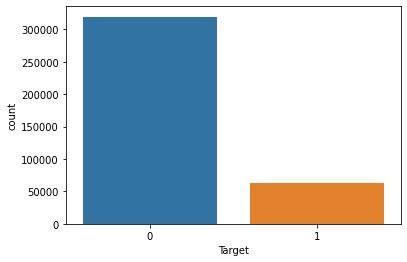

In [ ]:
# jumlah pelanggan yang churn
sns.countplot(x='Target', data=data)

In [ ]:
data['Target'].mean()

0.16381092439173736

Ternyata dataset cenderung lebih banyak memiliki informasi data pelanggan yang memutuskan `tidak lanjut berlangganan`/0 dan dengan persentase sekitar 16%

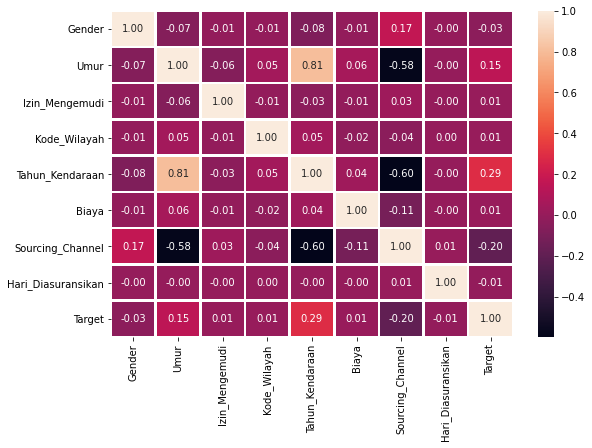

In [ ]:
corr = data.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

Korelasi merupakan salah satu teknik analisis dalam statistik yang digunakan untuk mencari `hubungan antara dua variabel` yang bersifat kuantitatif. Hubungan dua variabel tersebut dapat terjadi karena adanya `hubungan sebab akibat` atau dapat pula terjadi karena kebetulan saja. Korelasi memiliki range nilai tertinggi yaitu 1, semakin tinggi nilai korelasi maka semakin memiliki hubungan kedua variabel tersebut, sebaliknya semakin kecil atau minus berarti tidak memiliki nilai korelasi sama sekali

Yang memiliki hubungan yaitu varibel:
*   Tahun kendaraan dengan umur `0.81`
*   Target dengan tahun kendaraan `0.29`
*   Gender dengan sourching channel `0.15`
*   Umur dengan target `0.15`
*   Biaya dan dengan umur `0.06`
selain dari itu nilainya minus dan nilai korelsinya kecil mendekati 0



In [ ]:
data.groupby(['Gender','Target'])['Target'].count()

Gender  Target
Pria    0         157923
        1          34891
Wanita  0         133736
        1          23836
Name: Target, dtype: int64

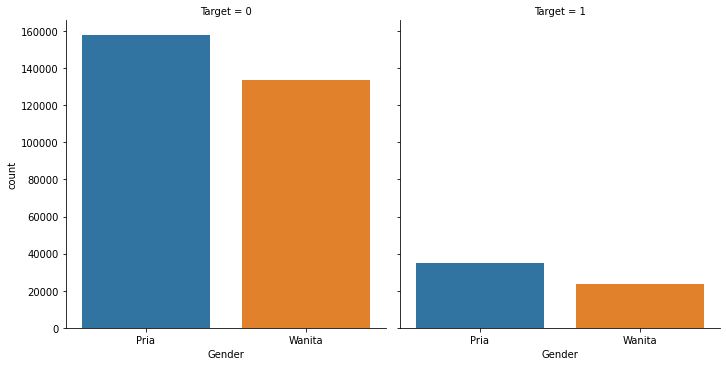

In [ ]:
sns.catplot(x='Gender', col='Target', kind='count', data=data)

Dari visualisasi yang disajikan, diperoleh data bahwa ternyata `pria` lebih banyak bertahan atau tidak bertahan

In [ ]:
data.groupby(['Izin_Mengemudi','Target'])['Target'].count()

Izin_Mengemudi  Target
0.0             0            346
                1             16
1.0             0         255133
                1          50012
Name: Target, dtype: int64

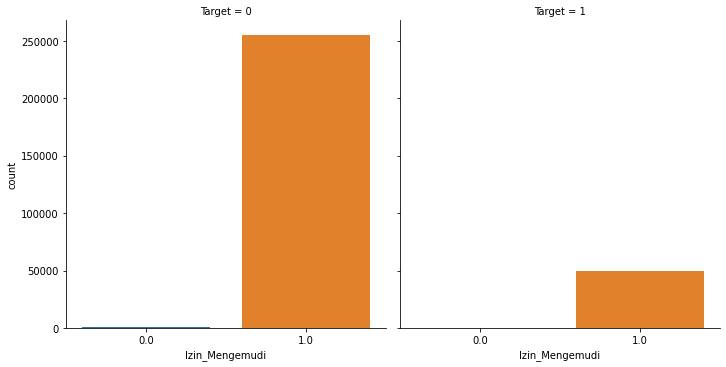

In [ ]:
sns.catplot(x='Izin_Mengemudi', col='Target', kind='count', data=data);

Dari data tersebut, ternyata banyak `memiliki SIM` bagi pelanggan yang memutuskan bertahan menggunakan layanan

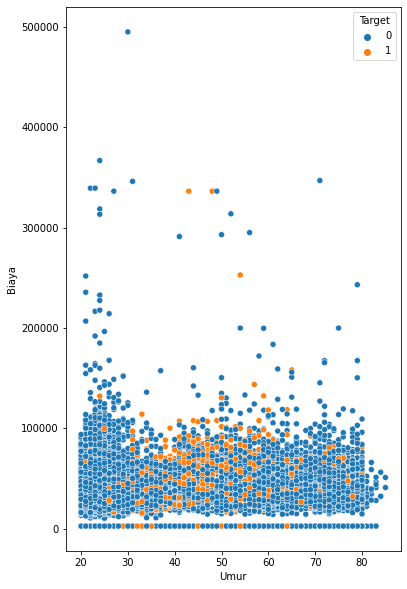

In [ ]:
fig, ax = plt.subplots(figsize= (6, 10))
sns.scatterplot(x="Umur", y = "Biaya" , hue="Target", data=data)

Visualisasi data yang diperoleh yaitu penyebaran data antara target 0 dan 1 dengan meilhat umur dan biaya yang dikeluarkan oleh pelanggan. 

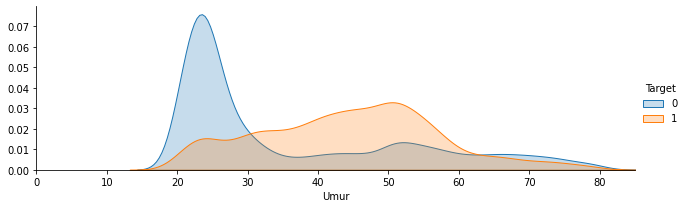

In [ ]:
facet = sns.FacetGrid(data, hue = "Target", aspect = 3)
facet.map(sns.kdeplot,"Umur",shade= True)
facet.set(xlim=(0, data["Umur"].max()))
facet.add_legend()

Dari visualisasi data yang diatas, ternyata pelanggan `diusia 15 - 33 tahun` cenderung tetap `bertahan`, terurama di usia sekitar `23 tahun`

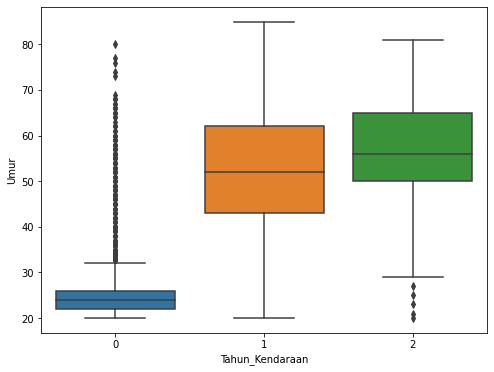

In [ ]:
fig, ax = plt.subplots(figsize= (8, 6))
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(x = 'Tahun_Kendaraan',  y = 'Umur', data = data)

Visualisasi data diatas ternyata pada usia 50 - 62 tahun banyak pelanggan yang tahun kendaraan diatas 2 tahun. kemudian 1-2 tahun untuk usia 43 - 60 tahun dan yang dibawah dua tahun sekitar usia diatas 21- 25 tahun

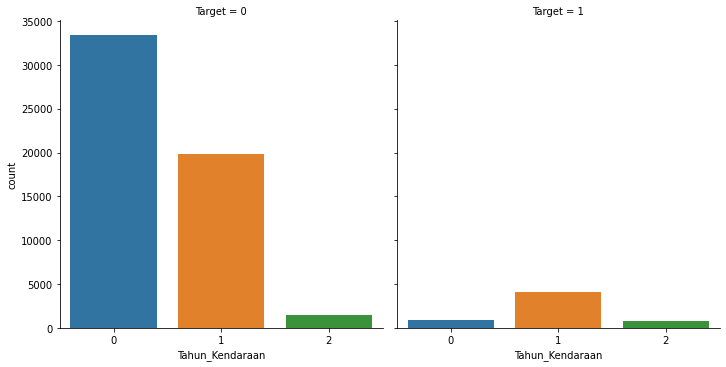

In [ ]:
sns.catplot(x='Tahun_Kendaraan', col='Target', kind='count', data=data)

Visualisasi data diatas diperoleh bahwa tahun kendaraan dibawah 1 tahun cukup banyak dibandingkan dengan lebih dari 2 tahun dan 1-2 tahun

# cleaning data

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

id                    0
Gender                0
Umur                  0
Izin_Mengemudi        0
Kode_Wilayah          0
Tanggal_Asuransi      0
Tahun_Kendaraan       0
Biaya                 0
Sourcing_Channel      0
Hari_Diasuransikan    0
Target                0
dtype: int64

In [ ]:
data.shape

(60557, 11)

# Preprocesssing data

`Pemilihan atribut penting atau atribut yang memiliki pengaruh pada target`

In [ ]:
data = data.drop(columns=['id', 'Tanggal_Asuransi'])

In [ ]:
data.head()

,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target
5,Pria,55.0,1.0,28.0,1-2 Tahun,54135.0,52.0,285.0,0
22,Pria,54.0,1.0,48.0,1-2 Tahun,2630.0,124.0,18.0,0
34,Pria,56.0,1.0,8.0,1-2 Tahun,38459.0,124.0,193.0,0
41,Wanita,57.0,1.0,35.0,1-2 Tahun,38384.0,26.0,254.0,0
48,Wanita,21.0,1.0,25.0,<1 Tahun,23492.0,160.0,154.0,0


`Transformasi data pada kolom-kolom tertentu yang memiliki nilai bertipe kategorik`

Mengganti nilai kolom `gender` dengan `pria` diganti dengan `1` dan `wanita` `0`

In [ ]:
data['Gender'].unique()

array(['Pria', 'Wanita'], dtype=object)

In [ ]:
data['Gender'] = data['Gender'].replace('Pria', 1)
data['Gender'] = data['Gender'].replace('Wanita', 0)

Mengganti nilai kolom `tahun kendaraan` yaitu:
1.   dibawah 1 tahun: 0
2.   1 - 2 tahun: 1
3.   diatas 2 tahun: 2



In [ ]:
data['Tahun_Kendaraan'].unique()

array(['1-2 Tahun', '<1 Tahun', '>2 Tahun'], dtype=object)

In [ ]:
data['Tahun_Kendaraan'] = data['Tahun_Kendaraan'].replace('<1 Tahun', 0)
data['Tahun_Kendaraan'] = data['Tahun_Kendaraan'].replace('1-2 Tahun', 1)
data['Tahun_Kendaraan'] = data['Tahun_Kendaraan'].replace('>2 Tahun', 2)

In [ ]:
data.head()

,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target
5,1,55.0,1.0,28.0,1,54135.0,52.0,285.0,0
22,1,54.0,1.0,48.0,1,2630.0,124.0,18.0,0
34,1,56.0,1.0,8.0,1,38459.0,124.0,193.0,0
41,0,57.0,1.0,35.0,1,38384.0,26.0,254.0,0
48,0,21.0,1.0,25.0,0,23492.0,160.0,154.0,0


`Normalisasi data dengan menggunakan min max scaler`

In [ ]:
scaler = MinMaxScaler()
data[['Gender','Umur','Izin_Mengemudi','Kode_Wilayah','Tahun_Kendaraan','Biaya','Sourcing_Channel','Hari_Diasuransikan']] = scaler.fit_transform(data[['Gender','Umur','Izin_Mengemudi','Kode_Wilayah','Tahun_Kendaraan','Biaya','Sourcing_Channel','Hari_Diasuransikan']])

In [ ]:
data.head()

,Gender,Umur,Izin_Mengemudi,Kode_Wilayah,Tahun_Kendaraan,Biaya,Sourcing_Channel,Hari_Diasuransikan,Target
5,1.0,0.538462,1.0,0.538462,0.5,0.104584,0.314815,0.951557,0
22,1.0,0.523077,1.0,0.923077,0.5,0.000000,0.759259,0.027682,0
34,1.0,0.553846,1.0,0.153846,0.5,0.072753,0.759259,0.633218,0
41,0.0,0.569231,1.0,0.673077,0.5,0.072600,0.154321,0.844291,0
48,0.0,0.015385,1.0,0.480769,0.0,0.042361,0.981481,0.498270,0


In [ ]:
from scipy.stats import chisquare
result = pd.DataFrame(columns=["Features", "Chi2Weights"])

for i in range(len(data.columns)):
    chi2, p = chisquare(data[data.columns[i]])
    result = result.append([pd.Series([data.columns[i], chi2], index = result.columns)], ignore_index=True)

In [ ]:
result = result.sort_values(by="Chi2Weights", ascending=False)

In [ ]:
result.head(9)

,Features,Chi2Weights
8,Target,54707.000000
0,Gender,25513.000000
4,Tahun_Kendaraan,20950.474027
1,Umur,15368.824874
7,Hari_Diasuransikan,10117.845478
6,Sourcing_Channel,9126.915476
3,Kode_Wilayah,8093.175713
5,Biaya,1449.219381
2,Izin_Mengemudi,66.000000


# Modelling

In [ ]:
atribut = data.drop(columns='Target')
label = data.Target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(atribut,label,test_size=0.2, random_state = 4)

In [ ]:
model = RandomForestClassifier(n_estimators=500, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
# generates every pixel in the table. MeshGrid creates one entry for every point from X1 to X2
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01))
# classifies every pixel as 0 or 1
plt.contourf(X1, X2, data.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Decision Tree Classifier')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

TypeError: ignored

# Evaluation Predict

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_predict)

array([[10765,   198],
       [  992,   157]])

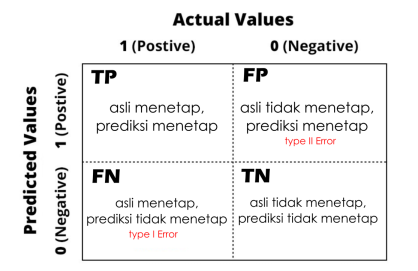

In [ ]:
print('accuracy: ', accuracy_score(y_test,y_predict))
print('precision: ', precision_score(y_test,y_predict))
print('recall: ', recall_score(y_test,y_predict))

accuracy:  0.9017503302509907
precision:  0.4422535211267606
recall:  0.13664055700609226


# Daftar pustaka



*   Fillna/data kosong: https://medium.com/analytics-vidhya/handling-missing-data-with-pandas-36fb8d268a0d `[diakses 21 Mei 2021]`
*   sorting data array: https://www.w3schools.com/python/numpy/numpy_array_sort.asp `[diakses 21 Mei 2021]`
*   Referensi EDA: https://www.kaggle.com/dejavu23/titanic-eda-to-ml-beginner `[diakses 21 Mei 2021]`
*   Confusion metrix: https://medium.com/@ksnugroho/confusion-matrix-untuk-evaluasi-model-pada-unsupervised-machine-learning-bc4b1ae9ae3f `[Diakses 24 Mei 2021]`
*   Random forest https://www.kaggle.com/prashant111/random-forest-classifier-tutorial
https://www.kaggle.com/prashant111/random-forest-classifier-feature-importance `[Diakses 4 Juni 2021]`
